In [ ]:
from ntscraper import Nitter
import pandas as pd

In [ ]:
scraper = Nitter(0)

Testing instances: 100%|██████████| 77/77 [01:22<00:00,  1.07s/it]


In [ ]:

def get_tweets_by_hashtag(hashtag, no):
    tweets = scraper.get_tweets(hashtag, mode='hashtag', number=no)
    final_tweets = []
    for x in tweets['tweets']:
        username = x['user']['username'] if 'user' in x and 'username' in x['user'] else None
        followers_count = x['user']['followers_count'] if 'user' in x and 'followers_count' in x['user'] else None
        retweets_count = x['retweets_count'] if 'retweets_count' in x else None

        data = [
            x['link'],
            x['text'],
            x['date'],
            x['stats']['likes'],
            x['stats']['comments'],
            username,
            followers_count,
            retweets_count
        ]
        final_tweets.append(data)
    return final_tweets

# Example usage
final_tweets = get_tweets_by_hashtag('RussiaUkraine', 10)

df_twitter = pd.DataFrame(final_tweets, columns=['twitter_link', 'text', 'date', 'likes', 'comments', 'username', 'followers_count', 'retweets_count'])

print(df_twitter)


INFO:root:No instance specified, using random instance https://nitter.privacydev.net


Empty DataFrame
Columns: [twitter_link, text, date, likes, comments, username, followers_count, retweets_count]
Index: []


In [ ]:
df_twitter.head()

,twitter_link,text,date,likes,comments,username,followers_count,retweets_count


TEXT AND STRUCTURAL DATA MINING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MISY/0403_UkraineCombinedTweetsDeduped.csv')

In [ ]:
df.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,0,621185967,MAAWLAW,"Mark A. A. Warner – International competition,...",NaN,972,4835,46773,2012-06-28 16:06:57.000000,1510406725827973121,2022-04-03 00:00:00.000000,0,“Europe’s ongoing #energy purchases send as mu...,"[{'text': 'energy', 'indices': [18, 25]}, {'te...",en,NaN,0,2022-04-03 00:07:10.203360
1,1,25199867,FairSnark,Mom; Hiker; SpEd Teacher; Navy Veteran\n\nNot ...,USA,841,705,52956,2009-03-19 00:49:09.000000,1510406726478020610,2022-04-03 00:00:00.000000,3131,"Very concerning news. Marianna, the pregnant g...","[{'text': 'Mariupol', 'indices': [73, 82]}]",en,NaN,0,2022-04-03 00:07:10.181038
2,2,1454933352755212288,Icibeyrouthnews,"Site d’information, d’analyse et d’investigati...",Lebanon,0,3808,6045,2021-10-31 22:08:45.000000,1510406726738059267,2022-04-03 00:00:00.000000,0,"#MONDE\n#Ukraine et désinformation, le nouveau...","[{'text': 'MONDE', 'indices': [0, 6]}, {'text'...",fr,NaN,0,2022-04-03 00:07:10.150624
3,3,1235244517307166725,InformazioneA,Aggiornamenti e podcast dedicati a questioni i...,NaN,102,937,10066,2020-03-04 16:43:53.000000,1510406727220441090,2022-04-03 00:00:00.000000,0,#UkraineRussiaWar War Report #2April #Russia #...,"[{'text': 'UkraineRussiaWar', 'indices': [0, 1...",en,NaN,0,2022-04-03 00:07:10.115536
4,4,1489888715493167105,TweetzLot,Mammal,Home is 3rd rock from the sun.,147,25,5312,2022-02-05 09:13:11.000000,1510406727270862852,2022-04-03 00:00:00.000000,878,"While trying to leave #Mariupol, the 🇷🇺 occupi...","[{'text': 'Mariupol', 'indices': [43, 52]}]",en,NaN,0,2022-04-03 00:07:10.096457


In [ ]:
df.shape

(445466, 18)

In [ ]:
df = df.drop_duplicates(subset='text', keep='first')
df.reset_index(drop=True, inplace=True)
df.shape

(112087, 18)

In [ ]:
df = df.loc[df['language'] == 'en']
df.shape


(61815, 18)

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'userid', 'username', 'acctdesc', 'location', 'following',
       'followers', 'totaltweets', 'usercreatedts', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language',
       'coordinates', 'favorite_count', 'extractedts'],
      dtype='object')


In [ ]:
columns_to_keep = ['userid', 'username', 'acctdesc', 'location', 'following',
                   'followers', 'totaltweets', 'usercreatedts', 'tweetcreatedts',
                   'retweetcount', 'text', 'hashtags', 'language']

new_column_names = ['User ID', 'User Name', 'About Account', 'Location', 'Following',
                    'Followers', 'TotalTweets', 'UserCreated', 'TweetCreated',
                    'RetweetCount', 'Tweet', 'Hashtags', 'Language']

# Select specific columns and rename them
df = df[columns_to_keep]
df.columns = new_column_names

print("DataFrame modified successfully.")

DataFrame modified successfully.


In [ ]:
df

,User ID,User Name,About Account,Location,Following,Followers,TotalTweets,UserCreated,TweetCreated,RetweetCount,Tweet,Hashtags,Language
0,621185967,MAAWLAW,"Mark A. A. Warner – International competition,...",NaN,972,4835,46773,2012-06-28 16:06:57.000000,2022-04-03 00:00:00.000000,0,“Europe’s ongoing #energy purchases send as mu...,"[{'text': 'energy', 'indices': [18, 25]}, {'te...",en
1,25199867,FairSnark,Mom; Hiker; SpEd Teacher; Navy Veteran\n\nNot ...,USA,841,705,52956,2009-03-19 00:49:09.000000,2022-04-03 00:00:00.000000,3131,"Very concerning news. Marianna, the pregnant g...","[{'text': 'Mariupol', 'indices': [73, 82]}]",en
3,1235244517307166725,InformazioneA,Aggiornamenti e podcast dedicati a questioni i...,NaN,102,937,10066,2020-03-04 16:43:53.000000,2022-04-03 00:00:00.000000,0,#UkraineRussiaWar War Report #2April #Russia #...,"[{'text': 'UkraineRussiaWar', 'indices': [0, 1...",en
4,1489888715493167105,TweetzLot,Mammal,Home is 3rd rock from the sun.,147,25,5312,2022-02-05 09:13:11.000000,2022-04-03 00:00:00.000000,878,"While trying to leave #Mariupol, the 🇷🇺 occupi...","[{'text': 'Mariupol', 'indices': [43, 52]}]",en
5,19897138,IndiaToday,"Brings you news breaks: Exclusive political, e...",India,245,6010709,1006258,2009-02-02 07:21:54.000000,2022-04-03 00:00:00.000000,2,War in Ukraine bring nuke war memories back. W...,"[{'text': 'Russia', 'indices': [65, 72]}, {'te...",en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112077,1503092602681372675,RadarPlane,Using the opensky api to track planes to and f...,NaN,0,19,2368,2022-03-13 19:36:27.000000,2022-04-03 23:59:54.000000,0,"icao24: #4baa0b, callsign: #THY4031 \nOrigin C...","[{'text': '4baa0b', 'indices': [8, 15]}, {'tex...",en
112078,1472359085060280332,Mozpit1,NaN,"New York, USA",69,12,315,2021-12-19 00:12:37.000000,2022-04-03 23:59:54.000000,0,@kiraincongress There is no humanity in these ...,"[{'text': 'Putin', 'indices': [198, 204]}]",en
112084,755817082860679168,ChefDad17,Devoted Father and Husband..Executive Chef..I ...,"Yadkin Valley, NC",2729,1729,16890,2016-07-20 17:30:09.000000,2022-04-03 23:59:57.000000,0,@BrandenburgHist Not talking about #Bucha . So...,"[{'text': 'Bucha', 'indices': [35, 41]}]",en
112085,1502259035189673987,KatyaMK26,NaN,NaN,28,65,1532,2022-03-11 12:24:28.000000,2022-04-03 23:59:57.000000,0,"""A doctor from #Zaporizhzhia writes: Girls wer...","[{'text': 'Zaporizhzhia', 'indices': [15, 28]}...",en


In [ ]:
df.isnull().sum()

User ID              0
User Name            0
About Account     9677
Location         22261
Following            0
Followers            0
TotalTweets          0
UserCreated          0
TweetCreated         0
RetweetCount         0
Tweet                0
Hashtags             0
Language             0
dtype: int64

In [ ]:
df = df.dropna(subset=df.columns.difference(['Location']))
df.reset_index(inplace=True, drop=True)
df


,User ID,User Name,About Account,Location,Following,Followers,TotalTweets,UserCreated,TweetCreated,RetweetCount,Tweet,Hashtags,Language
0,621185967,MAAWLAW,"Mark A. A. Warner – International competition,...",NaN,972,4835,46773,2012-06-28 16:06:57.000000,2022-04-03 00:00:00.000000,0,“Europe’s ongoing #energy purchases send as mu...,"[{'text': 'energy', 'indices': [18, 25]}, {'te...",en
1,25199867,FairSnark,Mom; Hiker; SpEd Teacher; Navy Veteran\n\nNot ...,USA,841,705,52956,2009-03-19 00:49:09.000000,2022-04-03 00:00:00.000000,3131,"Very concerning news. Marianna, the pregnant g...","[{'text': 'Mariupol', 'indices': [73, 82]}]",en
2,1235244517307166725,InformazioneA,Aggiornamenti e podcast dedicati a questioni i...,NaN,102,937,10066,2020-03-04 16:43:53.000000,2022-04-03 00:00:00.000000,0,#UkraineRussiaWar War Report #2April #Russia #...,"[{'text': 'UkraineRussiaWar', 'indices': [0, 1...",en
3,1489888715493167105,TweetzLot,Mammal,Home is 3rd rock from the sun.,147,25,5312,2022-02-05 09:13:11.000000,2022-04-03 00:00:00.000000,878,"While trying to leave #Mariupol, the 🇷🇺 occupi...","[{'text': 'Mariupol', 'indices': [43, 52]}]",en
4,19897138,IndiaToday,"Brings you news breaks: Exclusive political, e...",India,245,6010709,1006258,2009-02-02 07:21:54.000000,2022-04-03 00:00:00.000000,2,War in Ukraine bring nuke war memories back. W...,"[{'text': 'Russia', 'indices': [65, 72]}, {'te...",en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52133,68210221,cielian,Trust The Process,Republic of the Philippines,871,48,5252,2009-08-23 19:00:45.000000,2022-04-03 23:59:52.000000,1,Shop NOW\n https://t.co/O8zMx8ldGQ\nhttps://t....,"[{'text': 'Russia', 'indices': [198, 205]}, {'...",en
52134,215241559,ana10g,#fundthepolice #operationwarpspeed #trump2024 ...,PACIFIC NORTHWEST,1157,1120,2000,2010-11-13 11:30:51.000000,2022-04-03 23:59:53.000000,0,…and jen 'circle back' psaki wants to go work ...,"[{'text': 'maga', 'indices': [97, 102]}, {'tex...",en
52135,1503092602681372675,RadarPlane,Using the opensky api to track planes to and f...,NaN,0,19,2368,2022-03-13 19:36:27.000000,2022-04-03 23:59:54.000000,0,"icao24: #4baa0b, callsign: #THY4031 \nOrigin C...","[{'text': '4baa0b', 'indices': [8, 15]}, {'tex...",en
52136,755817082860679168,ChefDad17,Devoted Father and Husband..Executive Chef..I ...,"Yadkin Valley, NC",2729,1729,16890,2016-07-20 17:30:09.000000,2022-04-03 23:59:57.000000,0,@BrandenburgHist Not talking about #Bucha . So...,"[{'text': 'Bucha', 'indices': [35, 41]}]",en


In [ ]:
df = df[df['RetweetCount'] != 0]
df.reset_index(inplace=True, drop=True)
df

,User ID,User Name,About Account,Location,Following,Followers,TotalTweets,UserCreated,TweetCreated,RetweetCount,Tweet,Hashtags,Language
0,25199867,FairSnark,Mom; Hiker; SpEd Teacher; Navy Veteran\n\nNot ...,USA,841,705,52956,2009-03-19 00:49:09.000000,2022-04-03 00:00:00.000000,3131,"Very concerning news. Marianna, the pregnant g...","[{'text': 'Mariupol', 'indices': [73, 82]}]",en
1,1489888715493167105,TweetzLot,Mammal,Home is 3rd rock from the sun.,147,25,5312,2022-02-05 09:13:11.000000,2022-04-03 00:00:00.000000,878,"While trying to leave #Mariupol, the 🇷🇺 occupi...","[{'text': 'Mariupol', 'indices': [43, 52]}]",en
2,19897138,IndiaToday,"Brings you news breaks: Exclusive political, e...",India,245,6010709,1006258,2009-02-02 07:21:54.000000,2022-04-03 00:00:00.000000,2,War in Ukraine bring nuke war memories back. W...,"[{'text': 'Russia', 'indices': [65, 72]}, {'te...",en
3,268052347,Theophite,"Pronouns in bio. 🚰, more or less.",sealand (occupied doggerland),1024,20708,98672,2011-03-18 02:02:09.000000,2022-04-03 00:00:00.000000,1529,#Ukrainian journalist Taras Berezovets: in #Uk...,"[{'text': 'Ukrainian', 'indices': [18, 28]}, {...",en
4,152930351,AnonGhostt,Secret for Public,UK,7,5033,376527,2010-06-07 07:02:46.000000,2022-04-03 00:00:00.000000,51,The only sanction that Russia really can't get...,"[{'text': 'Bucha', 'indices': [132, 138]}]",en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,68210221,cielian,Trust The Process,Republic of the Philippines,871,48,5252,2009-08-23 19:00:45.000000,2022-04-03 23:59:34.000000,1,Shop NOW\n https://t.co/O8zMx8ldGQ\nhttps://t....,"[{'text': 'Russia', 'indices': [198, 205]}, {'...",en
17476,1296882302111408128,Roadmaster1253,Fighting ForJustice & Equality For All.. Power...,NaN,4568,2029,18213,2020-08-21 18:51:45.000000,2022-04-03 23:59:40.000000,24,JOE BIDEN IS GOING TO GO DOWN AS ONE OF THE HA...,[],en
17477,1295715136141963267,education_24x7,All education content. Education changes the l...,Delhi,7,6379,541464,2020-08-18 13:32:42.000000,2022-04-03 23:59:47.000000,1,#BitcoinButton #Friday #Anonymous #Anon #Priva...,"[{'text': 'BitcoinButton', 'indices': [17, 31]...",en
17478,3181732026,ykengus,"Normal, practical, logical.",NaN,101,81,23514,2015-05-01 13:52:12.000000,2022-04-03 23:59:47.000000,1,@IAPonomarenko @SpencerGuard Russia is now fre...,[],en


MAIN EVENT

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def preprocess_tweet(tweet):
    tweet = re.sub('[^a-zA-Z\s]', '', tweet.lower())  # Remove punctuation and special characters
    tokens = word_tokenize(tweet)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Apply lemmatization
    return ' '.join(tokens)


df['Processed_Tweet'] = df['Tweet'].apply(preprocess_tweet)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-28-a782555e2e63>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processed_Tweet'] = df['Tweet'].apply(preprocess_tweet)


In [ ]:
df.head()

,User ID,User Name,About Account,Location,Following,Followers,TotalTweets,UserCreated,TweetCreated,RetweetCount,Tweet,Hashtags,Language,Processed_Tweet
0,25199867,FairSnark,Mom; Hiker; SpEd Teacher; Navy Veteran\n\nNot ...,USA,841,705,52956,2009-03-19 00:49:09.000000,2022-04-03 00:00:00.000000,3131,"Very concerning news. Marianna, the pregnant g...","[{'text': 'Mariupol', 'indices': [73, 82]}]",en,concerning news marianna pregnant girl mariupo...
1,1489888715493167105,TweetzLot,Mammal,Home is 3rd rock from the sun.,147,25,5312,2022-02-05 09:13:11.000000,2022-04-03 00:00:00.000000,878,"While trying to leave #Mariupol, the 🇷🇺 occupi...","[{'text': 'Mariupol', 'indices': [43, 52]}]",en,trying leave mariupol occupier killed lithuani...
2,19897138,IndiaToday,"Brings you news breaks: Exclusive political, e...",India,245,6010709,1006258,2009-02-02 07:21:54.000000,2022-04-03 00:00:00.000000,2,War in Ukraine bring nuke war memories back. W...,"[{'text': 'Russia', 'indices': [65, 72]}, {'te...",en,war ukraine bring nuke war memory back watch r...
3,268052347,Theophite,"Pronouns in bio. 🚰, more or less.",sealand (occupied doggerland),1024,20708,98672,2011-03-18 02:02:09.000000,2022-04-03 00:00:00.000000,1529,#Ukrainian journalist Taras Berezovets: in #Uk...,"[{'text': 'Ukrainian', 'indices': [18, 28]}, {...",en,ukrainian journalist tara berezovets ukraine t...
4,152930351,AnonGhostt,Secret for Public,UK,7,5033,376527,2010-06-07 07:02:46.000000,2022-04-03 00:00:00.000000,51,The only sanction that Russia really can't get...,"[{'text': 'Bucha', 'indices': [132, 138]}]",en,sanction russia really cant get around would n...


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(tweet):
    # Run VADER on the tweet
    # Calculate the sentiment score
    sentiment_score = analyzer.polarity_scores(tweet)

    return sentiment_score['compound']


df['Sentiment Score'] = df['Processed_Tweet'].apply(analyze_sentiment)



<ipython-input-33-90b0a8db4bb4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment Score'] = df['Processed_Tweet'].apply(analyze_sentiment)


In [ ]:
df

,User ID,User Name,About Account,Location,Following,Followers,TotalTweets,UserCreated,TweetCreated,RetweetCount,Tweet,Hashtags,Language,Processed_Tweet,Sentiment Score
0,25199867,FairSnark,Mom; Hiker; SpEd Teacher; Navy Veteran\n\nNot ...,USA,841,705,52956,2009-03-19 00:49:09.000000,2022-04-03 00:00:00.000000,3131,"Very concerning news. Marianna, the pregnant g...","[{'text': 'Mariupol', 'indices': [73, 82]}]",en,concerning news marianna pregnant girl mariupo...,-0.4767
1,1489888715493167105,TweetzLot,Mammal,Home is 3rd rock from the sun.,147,25,5312,2022-02-05 09:13:11.000000,2022-04-03 00:00:00.000000,878,"While trying to leave #Mariupol, the 🇷🇺 occupi...","[{'text': 'Mariupol', 'indices': [43, 52]}]",en,trying leave mariupol occupier killed lithuani...,-0.6908
2,19897138,IndiaToday,"Brings you news breaks: Exclusive political, e...",India,245,6010709,1006258,2009-02-02 07:21:54.000000,2022-04-03 00:00:00.000000,2,War in Ukraine bring nuke war memories back. W...,"[{'text': 'Russia', 'indices': [65, 72]}, {'te...",en,war ukraine bring nuke war memory back watch r...,-0.8316
3,268052347,Theophite,"Pronouns in bio. 🚰, more or less.",sealand (occupied doggerland),1024,20708,98672,2011-03-18 02:02:09.000000,2022-04-03 00:00:00.000000,1529,#Ukrainian journalist Taras Berezovets: in #Uk...,"[{'text': 'Ukrainian', 'indices': [18, 28]}, {...",en,ukrainian journalist tara berezovets ukraine t...,-0.7200
4,152930351,AnonGhostt,Secret for Public,UK,7,5033,376527,2010-06-07 07:02:46.000000,2022-04-03 00:00:00.000000,51,The only sanction that Russia really can't get...,"[{'text': 'Bucha', 'indices': [132, 138]}]",en,sanction russia really cant get around would n...,-0.3400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,68210221,cielian,Trust The Process,Republic of the Philippines,871,48,5252,2009-08-23 19:00:45.000000,2022-04-03 23:59:34.000000,1,Shop NOW\n https://t.co/O8zMx8ldGQ\nhttps://t....,"[{'text': 'Russia', 'indices': [198, 205]}, {'...",en,shop httpstcoozmxldgq httpstcoozmxldgq httpstc...,0.0000
17476,1296882302111408128,Roadmaster1253,Fighting ForJustice & Equality For All.. Power...,NaN,4568,2029,18213,2020-08-21 18:51:45.000000,2022-04-03 23:59:40.000000,24,JOE BIDEN IS GOING TO GO DOWN AS ONE OF THE HA...,[],en,joe biden going go one hardest working preside...,0.3612
17477,1295715136141963267,education_24x7,All education content. Education changes the l...,Delhi,7,6379,541464,2020-08-18 13:32:42.000000,2022-04-03 23:59:47.000000,1,#BitcoinButton #Friday #Anonymous #Anon #Priva...,"[{'text': 'BitcoinButton', 'indices': [17, 31]...",en,bitcoinbutton friday anonymous anon privacy te...,-0.4588
17478,3181732026,ykengus,"Normal, practical, logical.",NaN,101,81,23514,2015-05-01 13:52:12.000000,2022-04-03 23:59:47.000000,1,@IAPonomarenko @SpencerGuard Russia is now fre...,[],en,iaponomarenko spencerguard russia free focus d...,0.6249


In [ ]:
# import pymongo

# username = 'thaffa3'
# password = 'GzeJLOIGfMv6Nzka'
# host = 'twitterwarehouse.3un9avw.mongodb.net'
# database_name = 'db1'
# collection_name = 'cn1'

# # Create the MongoDB connection string
# connection_string = f"mongodb+srv://{username}:{password}@{host}/{database_name}?retryWrites=true&w=majority"

# # Connect to MongoDB
# client = pymongo.MongoClient(connection_string)

# # Access the desired database and collection
# db = client[database_name]
# collection = db[collection_name]

# print("You have successfully logged in to MongoDB.")


In [ ]:
# # Access database and collection
# try:
#     db = client[database_name]
#     collection = db[collection_name]
#     print("Successfully connected to the MongoDB database and collection.")
# except AutoReconnect:
#     print("Error: Failed to access the MongoDB database or collection.")
#     exit()

# # Load data into MongoDB collection
# try:
#     # Convert DataFrame to dictionary format
#     data = df.to_dict(orient='records')

#     # Insert data into the collection
#     collection.insert_many(data)

#     print("Data loaded successfully into MongoDB collection.")
# except Exception as e:
#     print("Error occurred while loading data:", e)

#     client.close()


INSIGHT GENERATION WITH MACHINE LEARNING

Considering the nature of the data and the goal of understanding underlying themes or sentiments within the text, Latent Dirichlet Allocation (LDA) emerges as a highly suitable machine learning algorithm. LDA is particularly effective for discovering abstract topics within a collection of documents, making it ideal for analyzing textual data like opinions on wars.


LDA is a generative probabilistic model that assumes each document is a mixture of a certain number of topics, and each word in the document is generated by one of these topics. It allows for the identification of latent topics within the dataset, providing insights into the main themes present in the texts. This aligns well with the objective of understanding the sentiments and opinions expressed in a war-related dataset.


The process involves creating a bag-of-words representation of the documents, applying LDA to this representation to discover the latent topics, and then interpreting these topics based on the words that constitute them. The choice of the number of topics is a critical hyperparameter that needs to be determined through experimentation or domain knowledge.

Topic #0:
rainbow help college peaceandlove warinukraine raising behalf mercy supportukraine prayforukraine peaceinukraine gt helpukraine fund ukraine
Topic #1:
love painting amp russia opensea artist tb via support nfts standwithukraine nftcommunity art nft ukraine
Topic #2:
civilian buchamassacre people world kyiv amp photo standwithukraine putin war bucha ukrainian russia russian ukraine


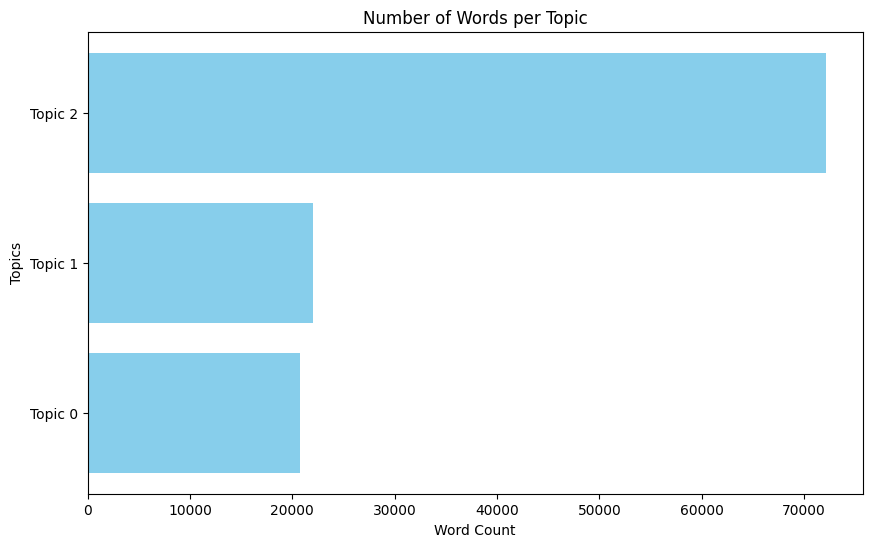

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt


vectorizer = TfidfVectorizer()
data_vectorized = vectorizer.fit_transform(df['Processed_Tweet'])
data_dense = data_vectorized.toarray()

num_topics = 3  # Increased number of topics for exploration

# Initialize and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(data_dense)

# Print the top words for each topic
for idx, topic in enumerate(lda_model.components_):
    print(f'Topic #{idx}:')
    top_indices = topic.argsort()[-15:]  # Display more top words for better insight
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_indices]
    print(' '.join(top_words))

# Visualize the topics
fig, ax = plt.subplots(figsize=(10, 6))
for topic_idx, topic in enumerate(lda_model.components_):
    plt.barh([f"Topic {topic_idx}"], [sum(topic)], color='skyblue')
plt.xlabel('Word Count')
plt.ylabel('Topics')
plt.title('Number of Words per Topic')
plt.show()


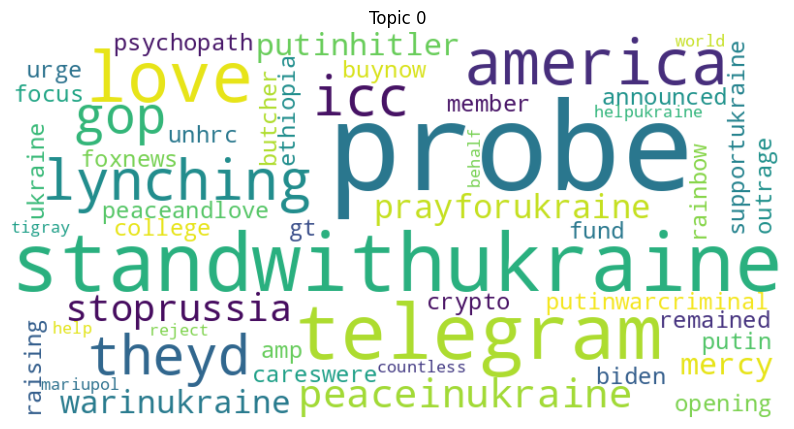

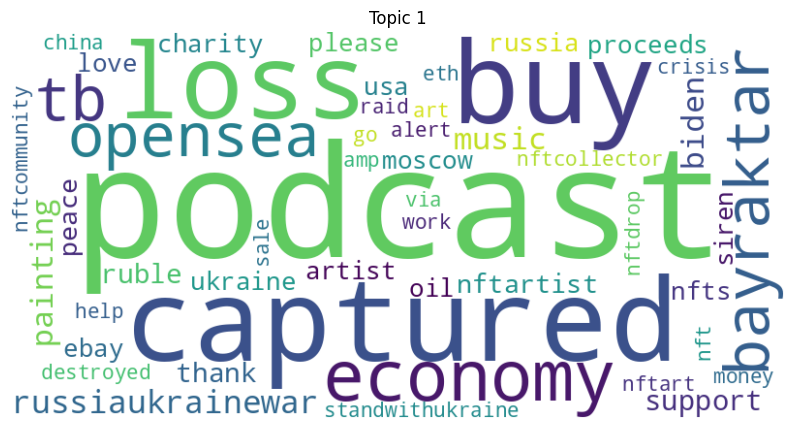

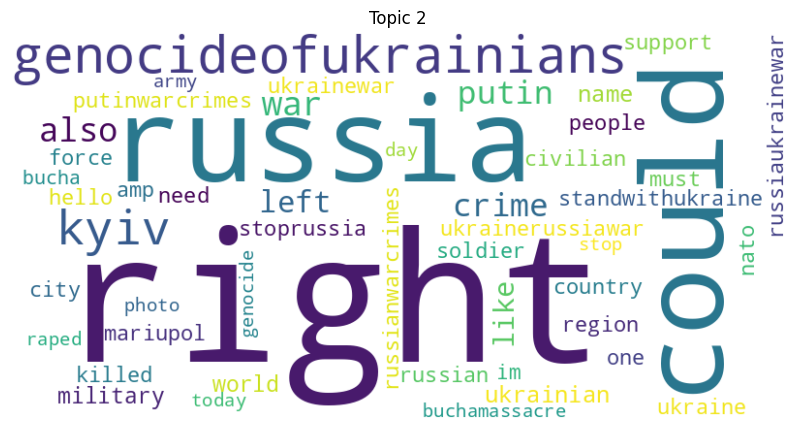

In [ ]:
from wordcloud import WordCloud


data_vectorized = vectorizer.fit_transform(df['Processed_Tweet'])
data_dense = data_vectorized.toarray()

num_topics = 3  # Increased number of topics for exploration

# Initialize and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(data_dense)

# Initialize a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Plot word clouds for each topic
for topic_idx, topic in enumerate(lda_model.components_):
    # Get the top 50 words for each topic
    top_indices = topic.argsort()[-50:]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_indices]
    word_freq = {word: topic[i] for i, word in enumerate(top_words)}

    # Generate the word cloud
    wordcloud.generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx}")
    plt.axis('off')
    plt.show()
